In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_scores_df

In [3]:
plt.rc('font', size=12)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss =  ['-', '--']

In [4]:
evaluation_datasets = [
    "MIXED-3-PO-2",
    "D3RLPY-PO-MP2-P0_20000",
    "D3RLPY-PO-MP2-P1_20000",
    "D3RLPY-PO-MP2-P2_20000",
    "D3RLPY-PO-MP2-P3_20000",
    "D3RLPY-PO-MP2-P4_20000",
    "D3RLPY-PO-MP2-P0_100000",
    "D3RLPY-PO-MP2-P1_100000",
    "D3RLPY-PO-MP2-P2_100000",
    "D3RLPY-PO-MP2-P3_100000",
    "D3RLPY-PO-MP2-P4_100000",
    "D3RLPY-PO-PAP2-P0_20000",
    "D3RLPY-PO-PAP2-P1_20000",
    "D3RLPY-PO-PAP2-P2_20000",
    "D3RLPY-PO-PAP2-P3_20000",
    "D3RLPY-PO-PAP2-P4_20000",
    "D3RLPY-PO-PAP2-P0_100000",
    "D3RLPY-PO-PAP2-P1_100000",
    "D3RLPY-PO-PAP2-P2_100000",
    "D3RLPY-PO-PAP2-P3_100000",
    "D3RLPY-PO-PAP2-P4_100000",
    "RAND-1-PO-2",
    "RAND-2-PO-2",
    "RAND-3-PO-2",
    "RAND-4-PO-2",
    "RAND-5-PO-2",
    "RAND-6-PO-2",
    "RAND-7-PO-2",
    "RAND-8-PO-2",
    "RAND-9-PO-2",
    "RAND-10-PO-2",
    "RAND-D3RLPY-PO-MP2-P0-1_100000",
    "RAND-D3RLPY-PO-MP2-P1-1_100000",
    "RAND-D3RLPY-PO-MP2-P2-1_100000",
    "RAND-D3RLPY-PO-MP2-P3-1_100000",
    "RAND-D3RLPY-PO-MP2-P4-1_100000",
    "RAND-D3RLPY-PO-PAP2-P0-1_100000",
    "RAND-D3RLPY-PO-PAP2-P1-1_100000",
    "RAND-D3RLPY-PO-PAP2-P2-1_100000",
    "RAND-D3RLPY-PO-PAP2-P3-1_100000",
    "RAND-D3RLPY-PO-PAP2-P4-1_100000",
]

training_datasets = [
    "RAND-2-PO-2",
    "RAND-9-PO-2",
    "D3RLPY-PO-MP2-P4_20000",
    "D3RLPY-PO-MP2-P1_20000",
    "D3RLPY-PO-PAP2-P0_20000",
]

experiments_no_rex = ['MP353', 'MP354', 'MP355']
experiments_mse_01 = ['MP356', 'MP357', 'MP358']
experiments_mse_1  = ['MP359', 'MP360', 'MP361']
experiments_mse_10 = ['MP362', 'MP363', 'MP364']

labels = ['No REx', 'REx - Beta 0.1', 'REx - Beta 1.0', 'REx - Beta 10.0']

In [5]:
scores_no_rex_df = get_scores_df(experiments_no_rex, evaluation_datasets)
scores_mse_01_df = get_scores_df(experiments_mse_01, evaluation_datasets)
scores_mse_1_df = get_scores_df(experiments_mse_1, evaluation_datasets)
scores_mse_10_df = get_scores_df(experiments_mse_10, evaluation_datasets)

In [6]:
scores_no_rex_groups = (
    scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_no_rex_avgs_df = scores_no_rex_groups.mean().reset_index()
scores_no_rex_mins_df = scores_no_rex_groups.min().reset_index()
scores_no_rex_maxs_df = scores_no_rex_groups.max().reset_index()

scores_mse_01_groups = (
    scores_mse_01_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_01_avgs_df = scores_mse_01_groups.mean().reset_index()
scores_mse_01_mins_df = scores_mse_01_groups.min().reset_index()
scores_mse_01_maxs_df = scores_mse_01_groups.max().reset_index()

scores_mse_1_groups = (
    scores_mse_1_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_1_avgs_df = scores_mse_1_groups.mean().reset_index()
scores_mse_1_mins_df = scores_mse_1_groups.min().reset_index()
scores_mse_1_maxs_df = scores_mse_1_groups.max().reset_index()

scores_mse_10_groups = (
    scores_mse_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_10_avgs_df = scores_mse_10_groups.mean().reset_index()
scores_mse_10_mins_df = scores_mse_10_groups.min().reset_index()
scores_mse_10_maxs_df = scores_mse_10_groups.max().reset_index()

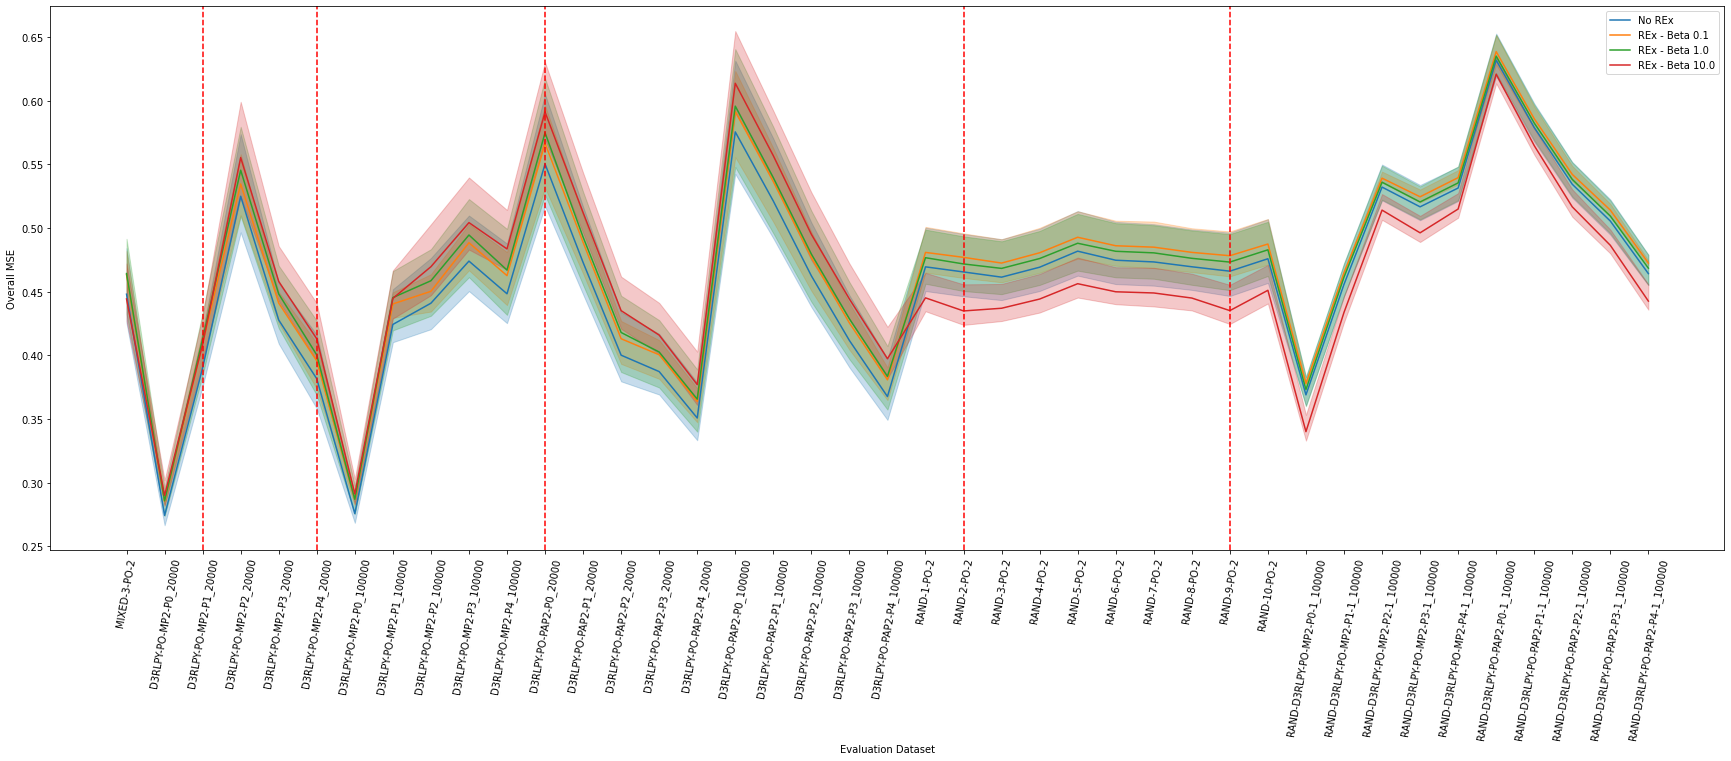

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

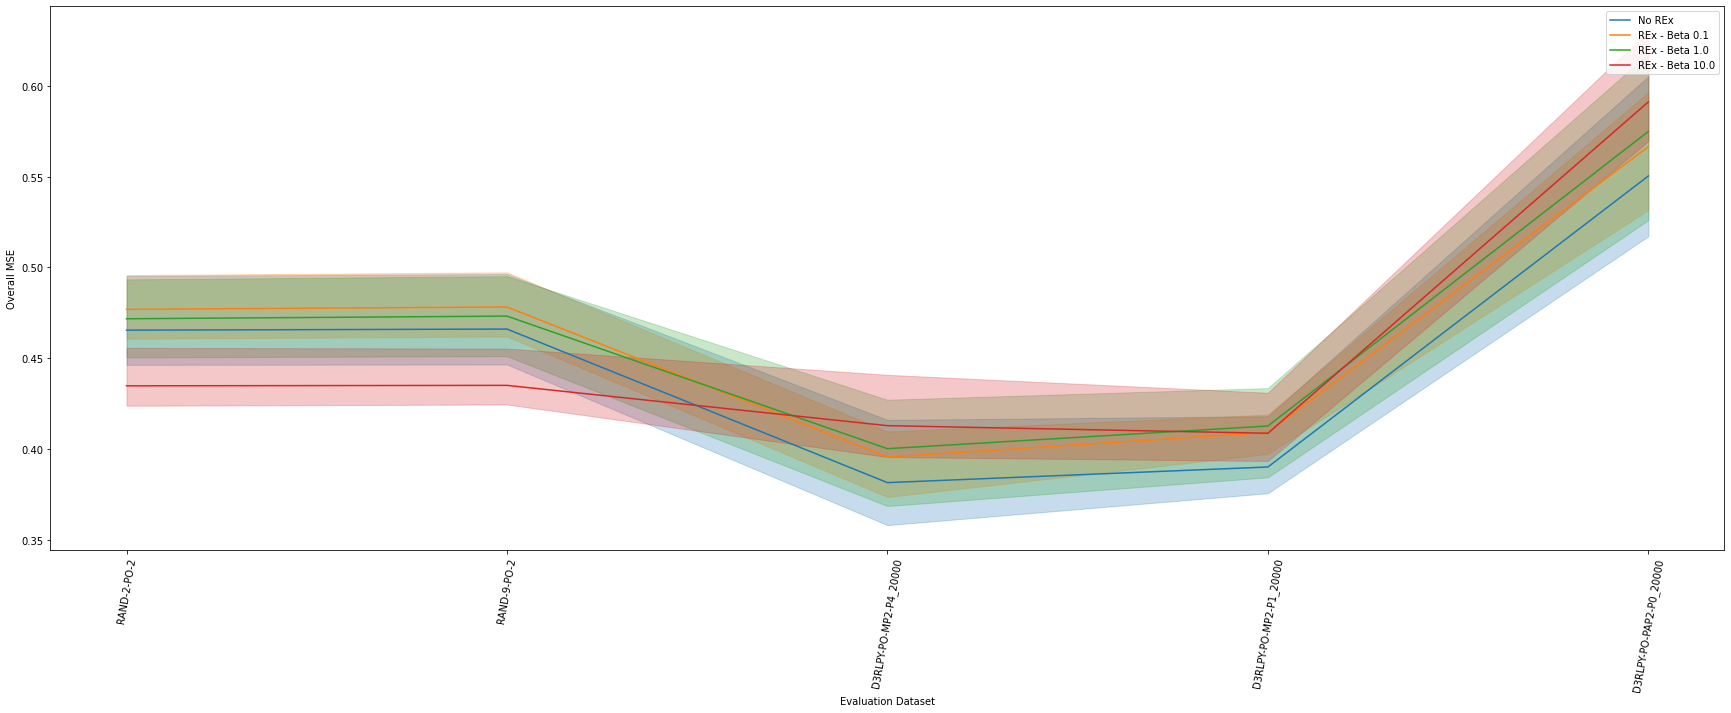

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

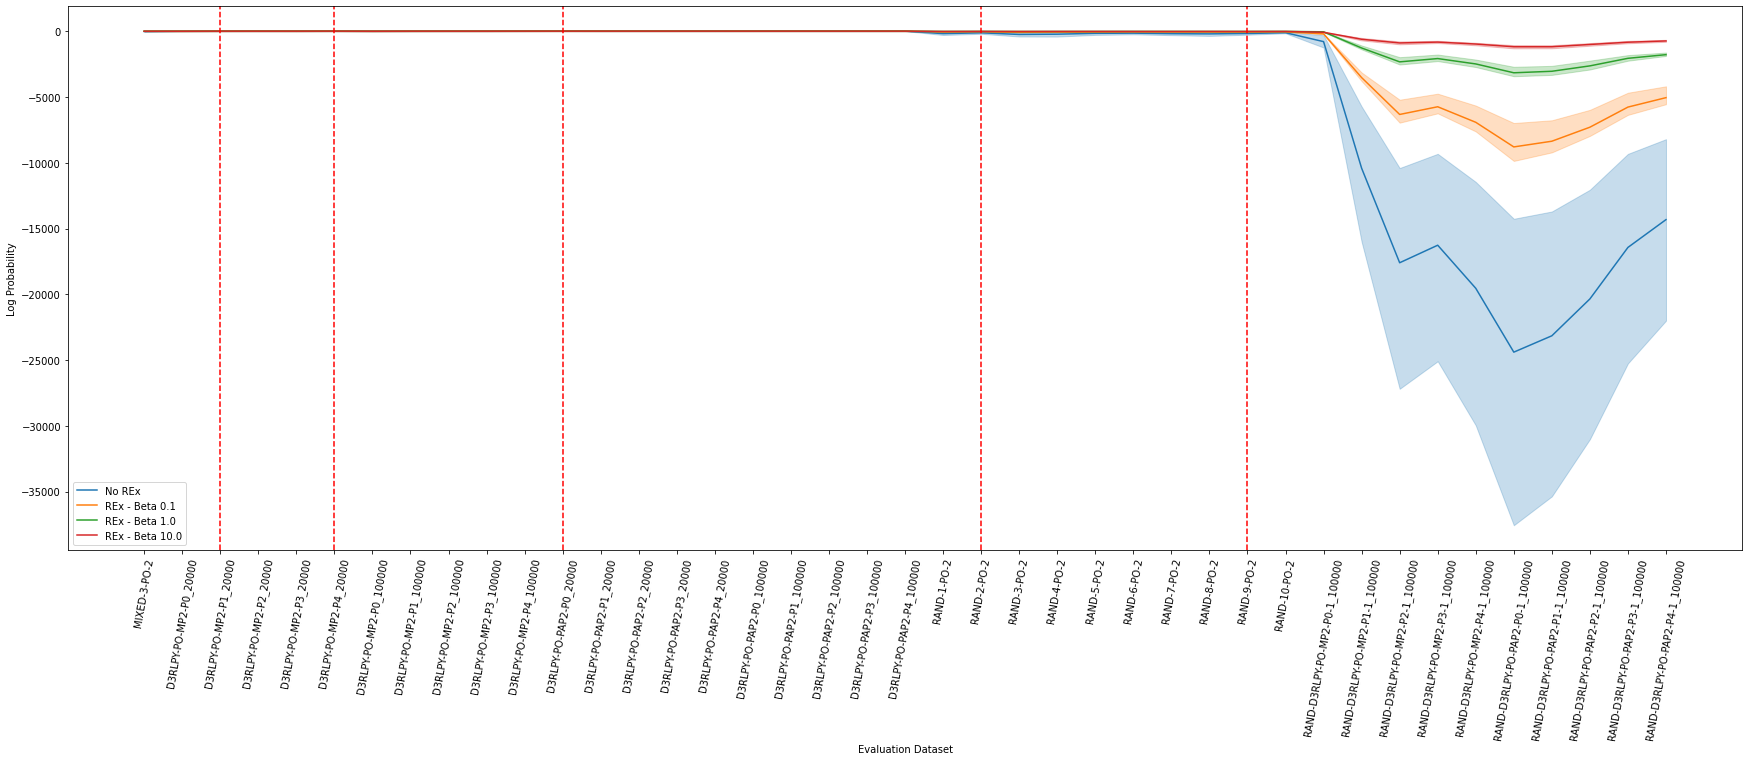

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

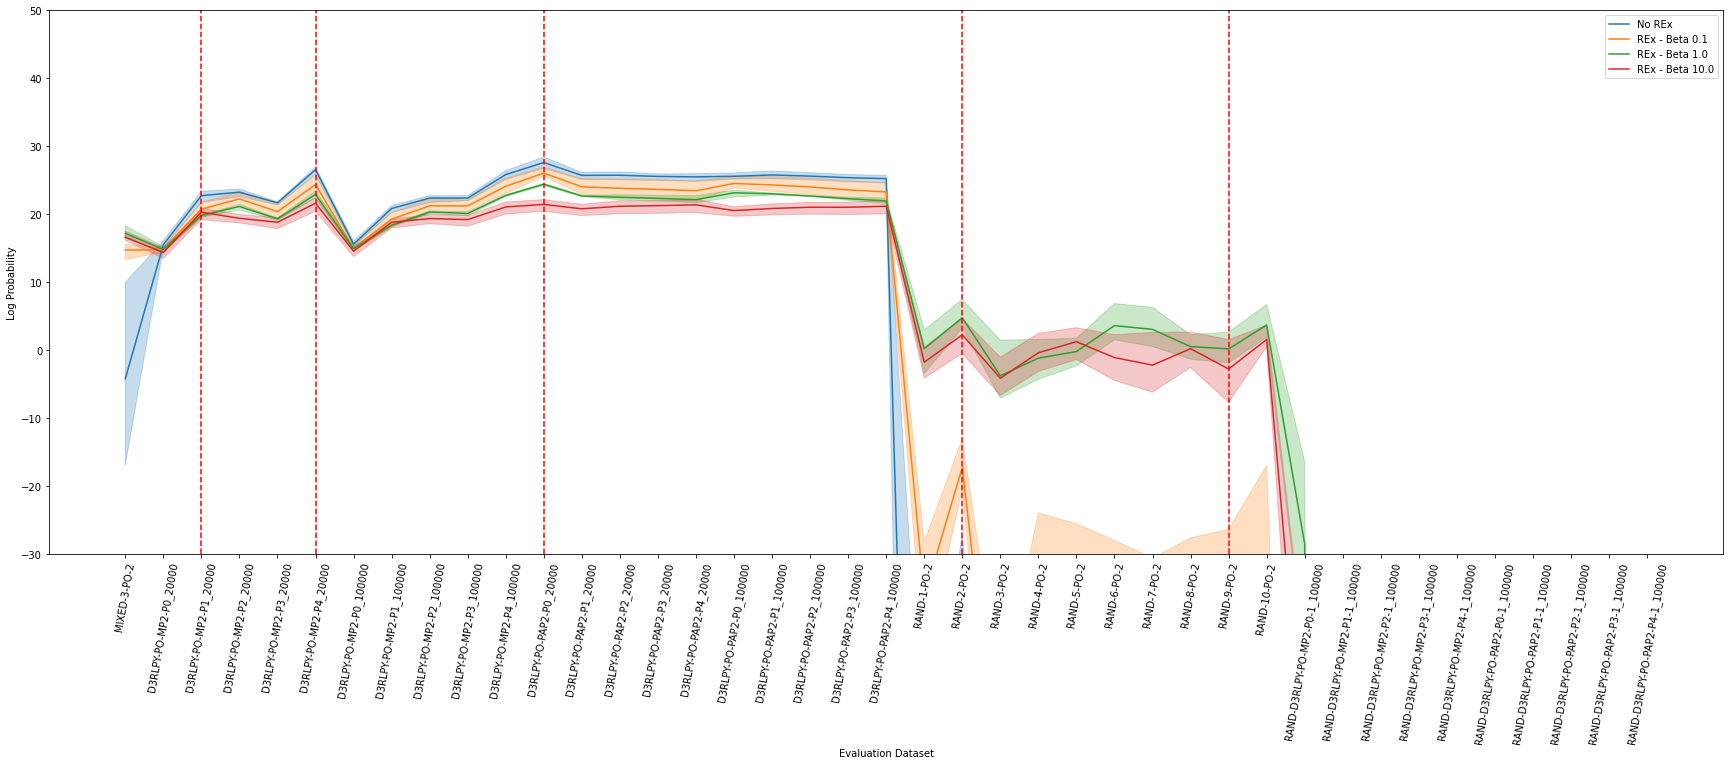

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-30.,50.)
ax.legend()

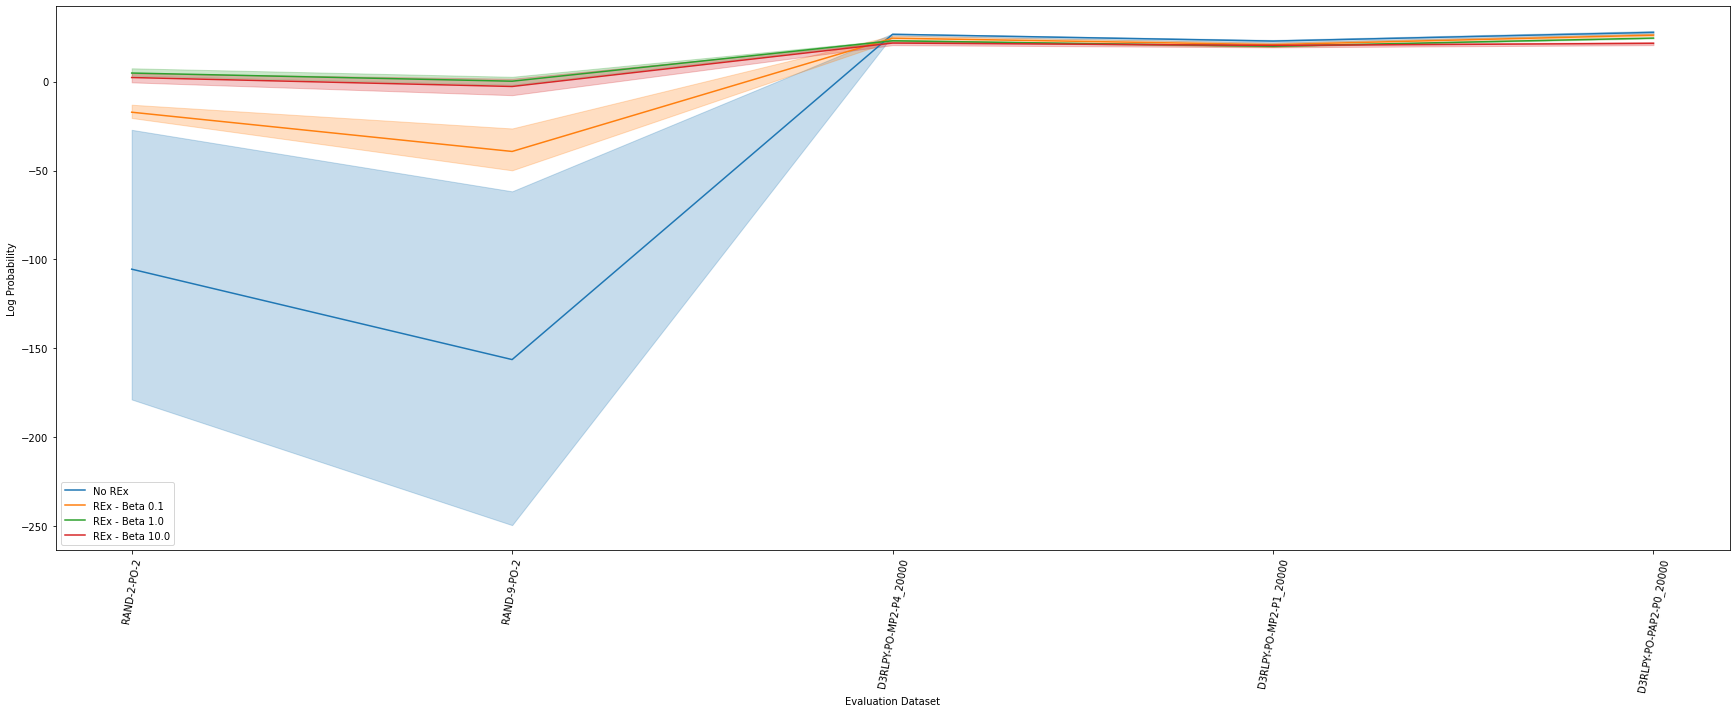

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()